# IMPORTING RELEVANT LIBRARIES



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import copy
%matplotlib inline

# READING THE DATASET

In [3]:
df=pd.read_csv(r'C:\Users\hp\Downloads\assign_2_real estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.shape

(414, 8)

In [6]:
d=copy.deepcopy(df) 
#we are making a copy of the dataframe so that we can study if dropping of features will be good for the model or not.
#as a copy does not reflect the changes in the original.

In [7]:
d.drop(['No','X5 latitude','X6 longitude'], axis=1, inplace=True)
#REMOVING THE FEATURES THAT DO NOT SEEM TO BE SIGNIFICANT AS OF NOW 
# because to create a simpler and more interpretable model.

In [8]:
d.columns=['X1','X2','X3','X4','Y']

In [9]:
d.head()

,X1,X2,X3,X4,Y
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


# PLOTTING THE DATASET

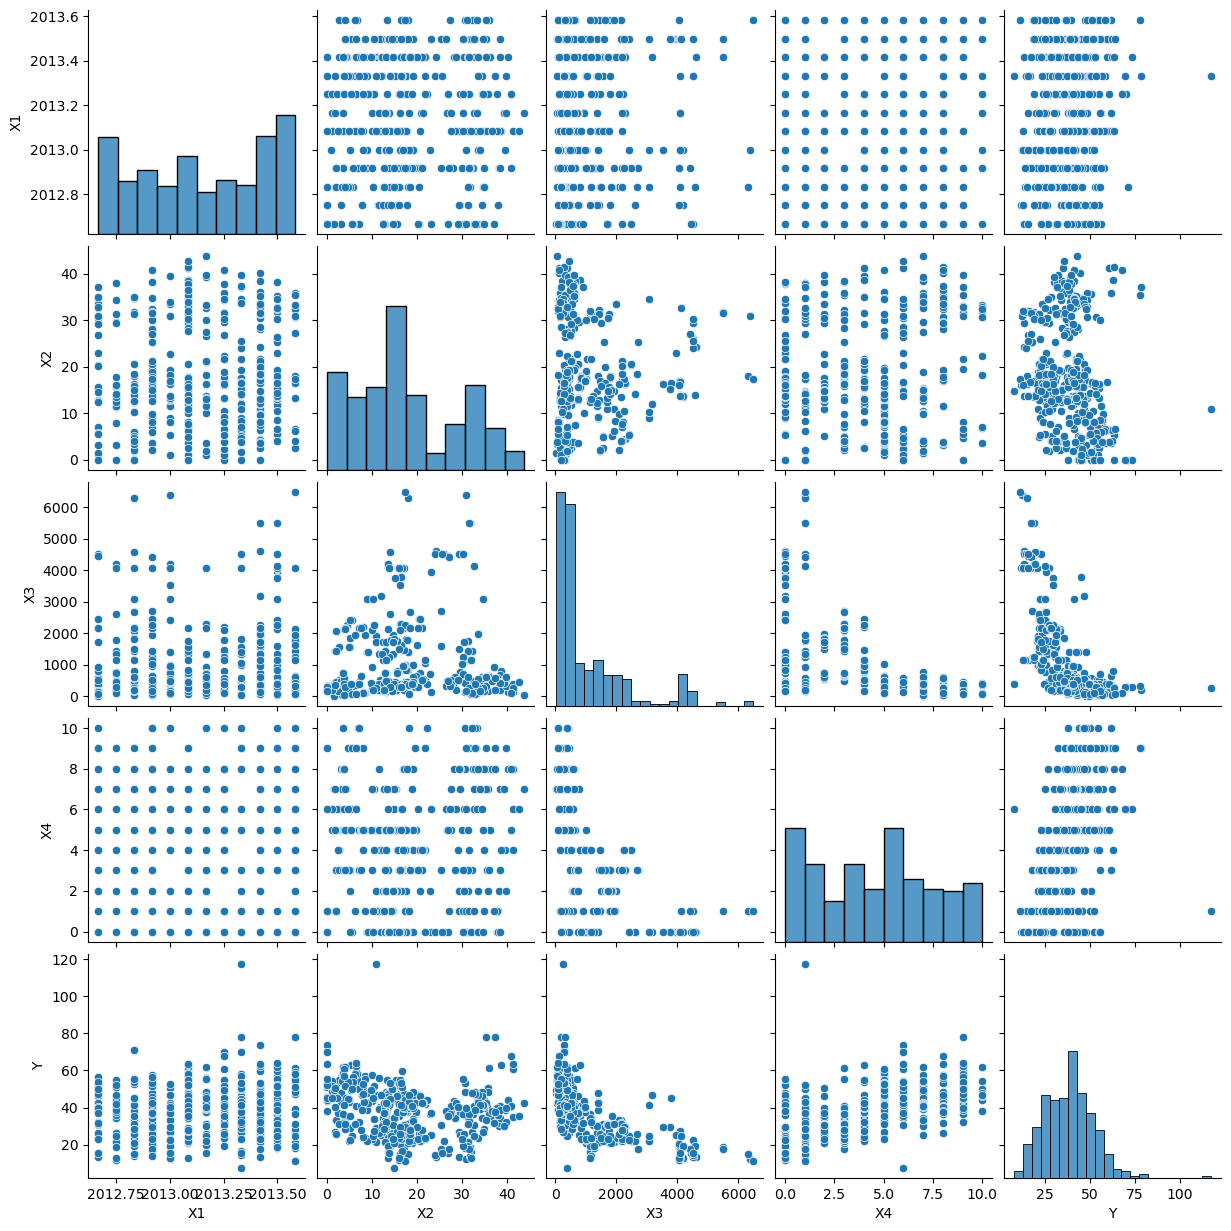

In [10]:
sb.pairplot(d)
#to understand the relation of individual independent features with the dependent feature at once.

# Preparing and Splitting data

In [11]:
x=d.iloc[:,:-1]
y=d.iloc[:,-1:]

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=50)

# FEATURE SCALING

C:\Users\hp\AppData\Local\Temp\ipykernel_8800\2087101625.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(xtrain)


<Axes: ylabel='Density'>

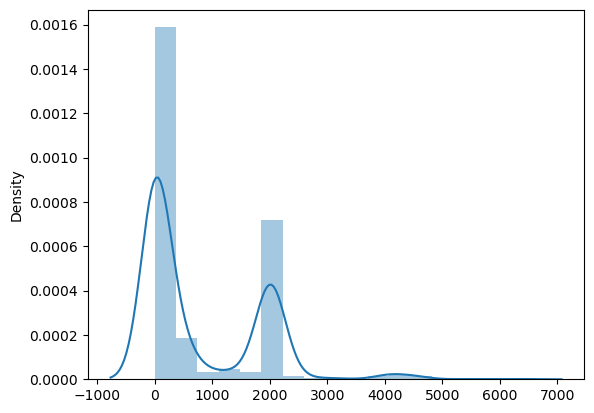

In [13]:
sb.distplot(xtrain)
#to check the normality, outliers, variance, mean, etc on the training dataset

In [14]:
#The purpose of scaling is to ensure that all the features (independent variables) are on a similar scale and make them comparable.
#independent variables have different units of measurement or scales 
#which can result in misleading interpretations of the coefficients and affect the model's performance.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [15]:
xscaled=scaler.transform(x)
xscaledtrain=scaler.transform(xtrain)
xscaledtest=scaler.transform(xtest)

C:\Users\hp\AppData\Local\Temp\ipykernel_8800\3539918912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(xscaledtrain)


<Axes: ylabel='Density'>

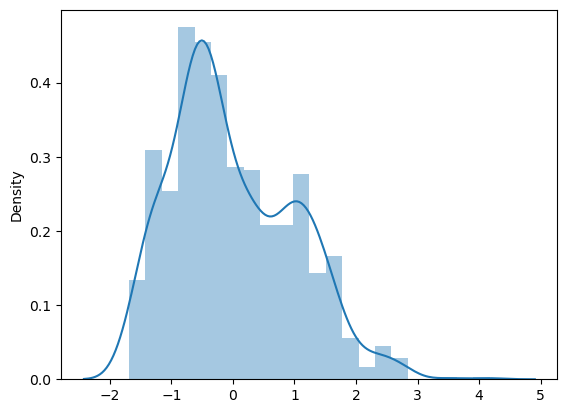

In [16]:
sb.distplot(xscaledtrain)
#here we have a close to bell shaped curve with mean 0 and variance 1 making the features comparable

# BUILD THE MODEL 

In [17]:
# to estimate the coefficients (slope and intercept) that
# minimize the sum of squared errors between the predicted and actual values.
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [18]:
reg.fit(xscaledtrain,ytrain)

LinearRegression()

In [19]:
ypred=reg.predict(xscaledtest)

In [20]:
reg.coef_
#checking the coefficients to study how the features are related to the dependent variable.
#X1 and X4 is directly positively related(Y increases as X1,X4 increases) and 
#X2,X3 are negatively related(Y decreases as X2,X3, increases)

array([[ 1.57175214, -2.78567428, -7.29212039,  3.46248552]])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
#to evaluate our model

In [22]:
mae

6.6625562088608525

In [23]:
mse

73.90939335135468

In [24]:
rmse

8.59705724951013

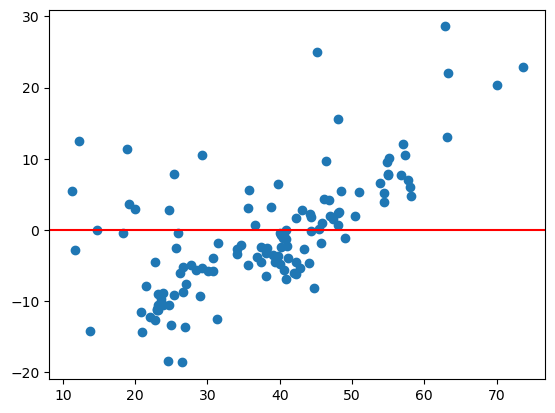

In [25]:
#residual plot of residuals vs true value
test_residuals=ytest-ypred
plt.scatter(ytest, test_residuals)
plt.axhline(y=0, color='r')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8800\3907048389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(test_residuals)


<Axes: ylabel='Density'>

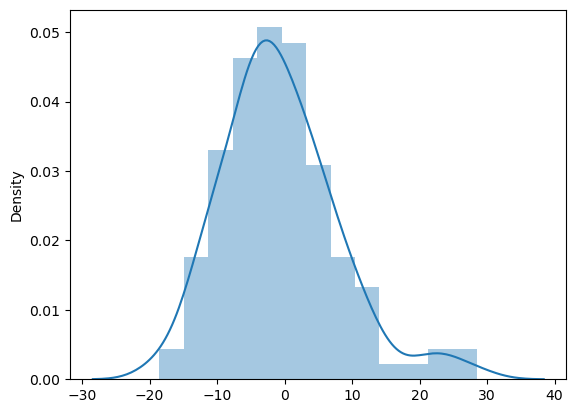

In [26]:
sb.distplot(test_residuals)
#to see if get a close to normal bell shaped graph

# Performing polynomial regression and finding the best model

In [27]:
from sklearn.preprocessing import PolynomialFeatures
training_rmse1 = []
test_rmse1 = []

for deg in range(1,12):
    
    polynomial_conv = PolynomialFeatures(degree = deg, include_bias=False)
    polynomial_feat = polynomial_conv.fit_transform(x)
    
    X_train1, X_test1, y_train1, y_test1 = train_test_split(polynomial_feat,y, test_size=0.3, random_state=50)
    
    mod = LinearRegression(fit_intercept=True)
    mod.fit(X_train1,y_train1)
    
    train_pred = mod.predict(X_train1)
    test_pred = mod.predict(X_test1)
    
    training_rmse = np.sqrt(mean_squared_error(y_train1,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test1,test_pred))
    
    training_rmse1.append(training_rmse)
    test_rmse1.append(test_rmse)

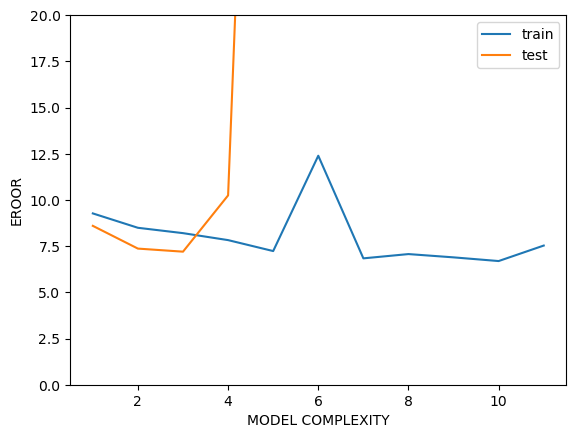

In [28]:
plt.plot(range(1,12),training_rmse1, label = 'train')
plt.plot(range(1,12),test_rmse1,label='test')
plt.xlabel("MODEL COMPLEXITY")
plt.ylabel("EROOR")
plt.ylim(0,20)
plt.legend()

In [29]:
#as we see that deg=3 gives the least error, we choose degree 3 as our model
poly=PolynomialFeatures(degree=3,include_bias=False, interaction_only=False)
polyf=poly.fit_transform(x)
from sklearn.model_selection import train_test_split
xscaledtrain,xscaledtest,ytrain,ytest=train_test_split(polyf,y, test_size=0.3, random_state=50)
fpmod=LinearRegression(fit_intercept=True).fit(xscaledtrain,ytrain)
fpmod

LinearRegression()

In [30]:
#now we again evaluate our model check if errors have minimised
fppred=fpmod.predict(xscaledtest)
maef=mean_absolute_error(ytest,fppred)
msef=mean_squared_error(ytest,fppred)
rmsef=np.sqrt(msef)

In [31]:
maef

5.169718291962892

In [32]:
msef

51.8399278711545

In [33]:
rmsef

7.199994991050653

# Here we see there is a slight reduction in our rmse value but we have to still try to minimise it further.
#### As we see that the rmse value is high on training data as well from the error vs model complexity plot, we can say that the model is underfitting. To deal with underfitting, we have to increase the model complexity, add features or reduce regularisation.
#### We have seen that further increasing the model complexity can shoot up the errors.
#### As regularisation deals with overfitting and increases the bias, it would not turn out to be as good as it is in the case of overfitting. As in ridge, the influence of features is reduced by shrinking the coefficients to zero and Lasso makes them zero. 
#### But as it is a case of underfitting, increasing the number of features will be helpful not decreasing them.
#### Lets us apply ElasticNet as it allows for a balance between sparsity and coefficient shrinkage, and it can be effective in situations where both Lasso and Ridge have limitations.

In [34]:
from sklearn.linear_model import ElasticNet
baseelasticm=ElasticNet()
para_grid={
    'alpha':[0.1,1,5,10,100],
    'l1_ratio':[0.1,0.5,0.7,0.8,0.9,1]
}
from sklearn.model_selection import GridSearchCV
gd=GridSearchCV(estimator=baseelasticm, param_grid=para_grid)
gd.fit(xscaledtrain, ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.045e+03, tolerance: 4.569e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.607e+03, tolerance: 3.751e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.484e+03, tolerance: 4.450e

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.8, 0.9, 1]})

In [35]:
gd.best_estimator_

ElasticNet(alpha=100, l1_ratio=1)

In [36]:
ypredgd=gd.predict(xscaledtest)
ypredgd

array([46.58978892, 31.07659913, 19.98472271, 42.58253327, 33.35279673,
       30.53442624, 41.89746667, 55.2374867 , 38.98737122, 49.00311914,
       45.08594903, 44.28635692, 32.2369842 , 26.32033867, 30.64439846,
       29.09223584, 54.30746564, 49.45505602, 32.41006786, 31.7807698 ,
       44.02105009, 20.6926138 , 48.22497131, 18.47717121, 54.451679  ,
       16.62683679, 44.12177188, 53.47724171, 29.02246294, 20.92204683,
       27.84271009, 56.2651022 , 31.32716395, 37.64992887, 31.40643683,
       27.9716372 , 27.79071096, 28.39498903, 42.29378235, 32.27122673,
       53.06807624, 50.70533062, 35.43978138, 42.69160389, 29.73212026,
       43.91441826, 21.97387228, 47.40028006, 54.20171286, 21.89781247,
       45.31495473, 32.40452911, 35.37826223, 33.9829445 , 10.95332602,
       38.32284059, 30.06897214, 35.00366851, 34.30831791, 41.1108851 ,
       28.13466359, 34.63723275, 22.08350374, 30.17679049, 43.40187306,
       43.60600666, 29.19704787, 51.93335062, 42.13656924, 40.33

In [37]:
maecv=mean_absolute_error(ytest,ypredgd)
msecv=mean_squared_error(ytest,ypredgd)
rmsecv=np.sqrt(msecv)

In [38]:
maecv

5.2319094431145405

In [39]:
msecv

50.79490251913466

In [40]:
rmsecv

7.127054266605149

# Here we see a reduction in the rmse value. 
### we will need to add more features in order to reduce it further.
### let us try to work with some of the features that we previously dropped in the copy and see if the rmse value reduces
### we will perform the same above steps 

In [41]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [42]:
df.drop(['No'], axis=1, inplace=True) #dropping one very insignificant column
df.columns=['X1','X2','X3','X4','X5','X6','Y']

C:\Users\hp\AppData\Local\Temp\ipykernel_8800\1040417861.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(xscaledtrain1)


<Axes: ylabel='Density'>

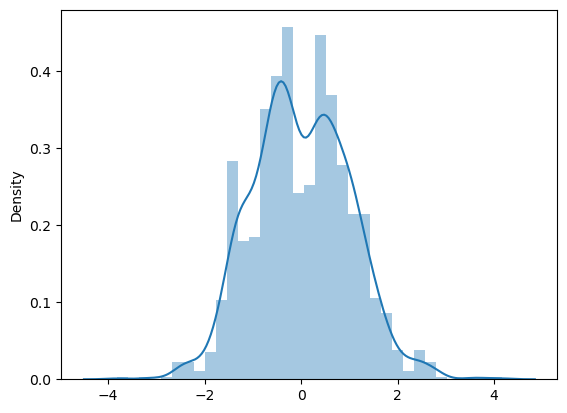

In [43]:
#preparing, splitting and scaling the data
x1=df.iloc[:,:-1]
y1=df.iloc[:,-1:]
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1, test_size=0.3, random_state=50)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain1)
x1scaled=scaler.transform(x1)
xscaledtrain1=scaler.transform(xtrain1)
xscaledtest1=scaler.transform(xtest1)
sb.distplot(xscaledtrain1)

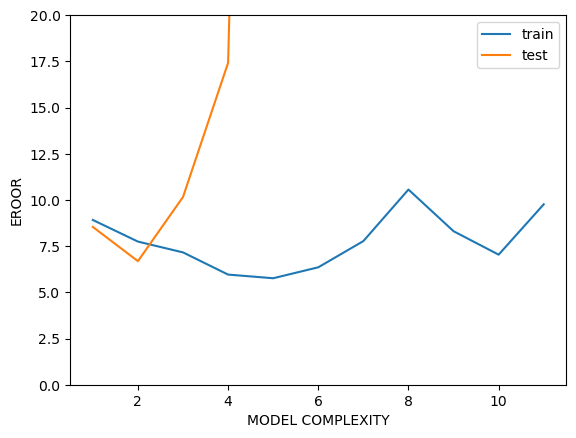

In [44]:
#analyzing the error vs model complexity plot.
training_rmse2 = []
test_rmse2 = []

for deg in range(1,12):
    
    polynomial_conv1 = PolynomialFeatures(degree = deg, include_bias=False)
    polynomial_feat1 = polynomial_conv1.fit_transform(x1)
    
    X_train2, X_test2, y_train2, y_test2 = train_test_split(polynomial_feat1,y1, test_size=0.3, random_state=50)
    
    mod1 = LinearRegression(fit_intercept=True)
    mod1.fit(X_train2,y_train2)
    
    train_pred1 = mod1.predict(X_train2)
    test_pred1 = mod1.predict(X_test2)
    
    training_rmse = np.sqrt(mean_squared_error(y_train2,train_pred1))
    test_rmse = np.sqrt(mean_squared_error(y_test2,test_pred1))
    
    training_rmse2.append(training_rmse)
    test_rmse2.append(test_rmse)
plt.plot(range(1,12),training_rmse2, label = 'train')
plt.plot(range(1,12),test_rmse2,label='test')
plt.xlabel("MODEL COMPLEXITY")
plt.ylabel("EROOR")
plt.ylim(0,20)
plt.legend()

In [45]:
#as we see deg=2 gives the minimum error
poly1=PolynomialFeatures(degree=2,include_bias=False, interaction_only=False)
polyf1=poly1.fit_transform(x1)
from sklearn.model_selection import train_test_split
xscaledtrain1,xscaledtest1,ytrain1,ytest1=train_test_split(polyf1,y1, test_size=0.3, random_state=50)
finalpmod=LinearRegression(fit_intercept=True).fit(xscaledtrain1,ytrain1)
finalpmod

LinearRegression()

In [46]:
fppred1=finalpmod.predict(xscaledtest1)
maef1=mean_absolute_error(ytest1,fppred1)
msef1=mean_squared_error(ytest1,fppred1)
rmsef1=np.sqrt(msef1)

In [47]:
maef1

4.86215628554821

In [48]:
msef1

44.715906352706206

In [49]:
rmsef1

6.686995315738318

In [50]:
from sklearn.linear_model import ElasticNet
baseelasticm1=ElasticNet()
para_grid1={
    'alpha':[0.1,0.01,1],
    'l1_ratio':[0.001,0.5,0.7,0.8]
}
from sklearn.model_selection import GridSearchCV
gd1=GridSearchCV(estimator=baseelasticm1, param_grid=para_grid1)
gd1.fit(xscaledtrain1, ytrain1)
gd1.best_estimator_

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+03, tolerance: 4.569e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.170e+03, tolerance: 3.751e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.750e+03, tolerance: 4.450e

ElasticNet(alpha=1, l1_ratio=0.001)

In [51]:
ypredgd1=gd1.predict(xscaledtest1)

In [60]:
maecv1=mean_absolute_error(ytest1,ypredgd1)
msecv1=mean_squared_error(ytest1,ypredgd1)
rmsecv1=np.sqrt(msecv1)

In [61]:
maecv1

5.0117349626952645

In [62]:
msecv1

48.52839826326969

In [63]:
rmsecv1

6.966232716703462

# till now i have analyzed the error vs complexity graph on unscaled data. let us check for error vs complexity graph on scaled data.

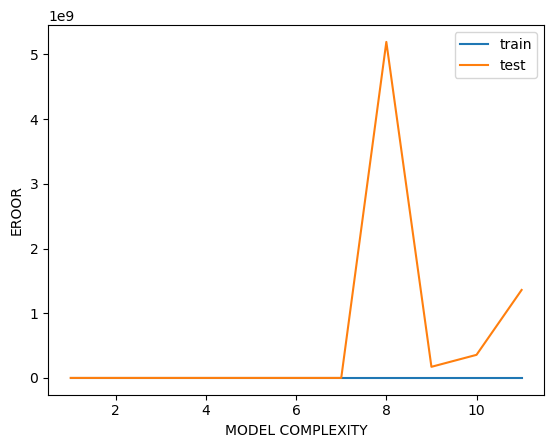

In [56]:
training_rmse3 = []
test_rmse3 = []

for deg in range(1,12):
    
    polynomial_conv2 = PolynomialFeatures(degree = deg, include_bias=False)
    polynomial_feat2 = polynomial_conv2.fit_transform(x1scaled)
    
    X_train3, X_test3, y_train3, y_test3 = train_test_split(polynomial_feat2,y1, test_size=0.3, random_state=50)
    
    mod2 = LinearRegression(fit_intercept=True)
    mod2.fit(X_train3,y_train3)
    
    train_pred2 = mod2.predict(X_train3)
    test_pred2 = mod2.predict(X_test3)
    
    training_rmse = np.sqrt(mean_squared_error(y_train3,train_pred2))
    test_rmse = np.sqrt(mean_squared_error(y_test3,test_pred2))
    
    training_rmse3.append(training_rmse)
    test_rmse3.append(test_rmse)
plt.plot(range(1,12),training_rmse3, label = 'train')
plt.plot(range(1,12),test_rmse3,label='test')
plt.xlabel("MODEL COMPLEXITY")
plt.ylabel("EROOR")
plt.legend()

# here we notice an overfitting curve as the error on training model is very low.
# let us try applying regularisation techniques.

In [82]:
from sklearn.linear_model import RidgeCV
rcvmodel=RidgeCV(alphas=(0.1,1,10,100))
rcvmodel.fit(xscaledtrain1,ytrain1)

RidgeCV(alphas=(0.1, 1, 10, 100))

In [83]:
rcvpred=rcvmodel.predict(xscaledtest1)

In [84]:
MAE=mean_absolute_error(ytest1,rcvpred)
MSE=mean_squared_error(ytest1,rcvpred)
RMSE=np.sqrt(MSE)

In [85]:
MAE

4.915337087774978

In [86]:
MSE

45.99484015375168

In [87]:
RMSE

6.781949583545404

In [88]:
rcvmodel.alpha_

100.0

In [89]:
from sklearn.linear_model import ElasticNet
baseelasticm2=ElasticNet()
para_grid2={
    'alpha':[0.1,0.01,1],
    'l1_ratio':[0.001,0.5,0.7,0.8]
}
from sklearn.model_selection import GridSearchCV
gd2=GridSearchCV(estimator=baseelasticm2, param_grid=para_grid2)
gd2.fit(xscaledtrain1, ytrain1)
gd2.best_estimator_

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+03, tolerance: 4.569e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.170e+03, tolerance: 3.751e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.750e+03, tolerance: 4.450e

ElasticNet(alpha=1, l1_ratio=0.001)

In [90]:
ypredgd2=gd2.predict(xscaledtest1)

In [91]:
MAE2=mean_absolute_error(ytest1,ypredgd2)
MSE2=mean_squared_error(ytest1,ypredgd2)
RMSE2=np.sqrt(MSE)

In [92]:
MAE2

5.0117349626952645

In [93]:
MSE2

48.52839826326969

In [94]:
RMSE2

6.781949583545404

# after performing various techniques, we have got the least rmse value of 6.686995315738318 on a polynomial regression model (unscaled x, with more features) of degree 2.